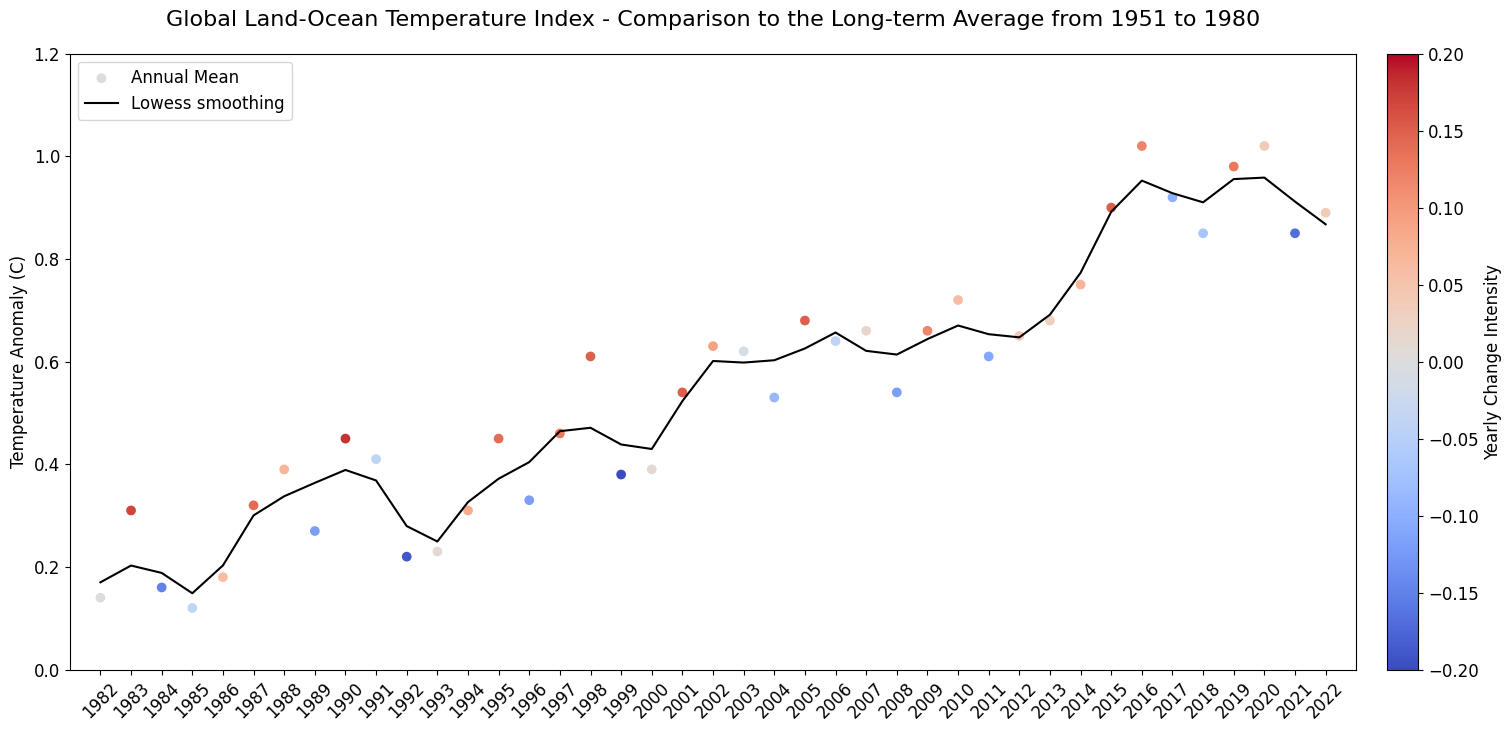

In [3]:
import pandas as pd  
import matplotlib.pyplot as plt  
from matplotlib import rcParams 
import statsmodels.api as sm 

# Set the font
font = 'sans-serif'  
rcParams['font.family'] = font
rcParams['font.size'] = 12

# Define data for plotting.
data = {
    'Year': [1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
              2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],

    'Annual Mean': [0.14, 0.31, 0.16, 0.12, 0.18, 0.32, 0.39, 0.27, 0.45, 0.41, 0.22, 0.23, 0.31, 0.45, 0.33, 0.46, 0.61, 0.38, 0.39, 0.54, 0.63, 0.62, 0.53,
                     0.68, 0.64, 0.66, 0.54, 0.66, 0.72, 0.61, 0.65, 0.68, 0.75, 0.9, 1.02, 0.92, 0.85, 0.98, 1.02, 0.85, 0.89],
                     
    'Lowess(5)': [0.22, 0.21, 0.21, 0.22, 0.24, 0.27, 0.31, 0.33, 0.33, 0.33, 0.33, 0.33, 0.34, 0.37, 0.4, 0.42, 0.44, 0.47, 0.5, 0.52, 0.55, 0.58, 0.61, 0.62,
                   0.62, 0.63, 0.64, 0.64, 0.65, 0.67, 0.7, 0.74, 0.79, 0.83, 0.88, 0.91, 0.93, 0.92, 0.92, 0.91, 0.9]}

# Convert the data dictionary into a pandas DataFrame.
df = pd.DataFrame(data)

# Set the index
df.set_index("Year", inplace=True)

# Use LOWESS to fit a smooth line
lowess = sm.nonparametric.lowess
df['lowess'] = lowess(df['Annual Mean'], df.index, frac=0.1)[:, 1]

# Calculate the differences
df['change'] = df['Annual Mean'].diff().fillna(0)

# Normalize the changes to use in the color map
# Set the range from -0.2 to 0.2 explicitly
norm = plt.Normalize(-0.2, 0.2)

# Plot the data and the LOWESS smoothing
plt.figure(figsize=(20, 8))

# Scatter plot for the annual mean with color intensity
sc = plt.scatter(df.index, df['Annual Mean'], c=df['change'], cmap='coolwarm', norm=norm, label='Annual Mean', alpha=1)

# LOWESS smoothing line
plt.plot(df.index, df['lowess'], label='Lowess smoothing', color='black')

# Set the x-axis and y-axis limits and define x-axis ticks.
plt.xlim(1981, 2023)  # Adding one year of padding on both sides
plt.ylim(0, 1.2)      # Set limits for the y-axis
plt.xticks(range(1982, 2023, 1), rotation=45)  # Adjust this if you want fewer ticks

# Labels and title
plt.ylabel('Temperature Anomaly (C)')
plt.title('Global Land-Ocean Temperature Index - Comparison to the Long-term Average from 1951 to 1980', fontsize = 16, pad=20)

# Legend
plt.legend(loc='upper left')

# Add a color bar with adjusted position and range
cbar = plt.colorbar(sc, pad=0.02, aspect=20)
cbar.set_label('Yearly Change Intensity')

# Show the plot
plt.show()